<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html day8.do.txt --no_mako -->
<!-- dom:TITLE: Summary on Neural Networks, start discussiin of Convolutional (CNN) and Recurrent (RNN) Neural Networks. -->

# Summary on Neural Networks, start discussiin of Convolutional (CNN) and Recurrent (RNN) Neural Networks.
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Dec 12, 2021**

Copyright 1999-2021, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license

## Plan for week 50, December 13-17

* Summary of Neural networks, pros and cons

* Start discussing CNNs

Reading suggestions: [Aurelien Geron's chapters 13 and 14](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/TensorflowML.pdf). See also discussions in Goodfellow et al, chapters 6-7, 9-12.

**Excellent lectures on CNNs and RNNs.**

* [Video  on Convolutional Neural Networks from MIT](https://www.youtube.com/watch?v=iaSUYvmCekI&ab_channel=AlexanderAmini)

* [Video  on Recurrent Neural Networks from MIT](https://www.youtube.com/watch?v=SEnXr6v2ifU&ab_channel=AlexanderAmini)

## Building neural networks in Tensorflow and Keras

Now we want  to build on the experience gained from our neural network implementation in NumPy and scikit-learn
and use it to construct a neural network in Tensorflow. Once we have constructed a neural network in NumPy
and Tensorflow, building one in Keras is really quite trivial, though the performance may suffer.  

In our previous example we used only one hidden layer, and in this we will use two. From this it should be quite
clear how to build one using an arbitrary number of hidden layers, using data structures such as Python lists or
NumPy arrays.

## Tensorflow

Tensorflow is an open source library machine learning library
developed by the Google Brain team for internal use. It was released
under the Apache 2.0 open source license in November 9, 2015.

Tensorflow is a computational framework that allows you to construct
machine learning models at different levels of abstraction, from
high-level, object-oriented APIs like Keras, down to the C++ kernels
that Tensorflow is built upon. The higher levels of abstraction are
simpler to use, but less flexible, and our choice of implementation
should reflect the problems we are trying to solve.

[Tensorflow uses](https://www.tensorflow.org/guide/graphs) so-called graphs to represent your computation
in terms of the dependencies between individual operations, such that you first build a Tensorflow *graph*
to represent your model, and then create a Tensorflow *session* to run the graph.

In this guide we will analyze the same data as we did in our NumPy and
scikit-learn tutorial, gathered from the MNIST database of images. We
will give an introduction to the lower level Python Application
Program Interfaces (APIs), and see how we use them to build our graph.
Then we will build (effectively) the same graph in Keras, to see just
how simple solving a machine learning problem can be.

To install tensorflow on Unix/Linux systems, use pip as

In [1]:
pip3 install tensorflow

and/or if you use **anaconda**, just write (or install from the graphical user interface)
(current release of CPU-only TensorFlow)

In [2]:
conda create -n tf tensorflow
conda activate tf

To install the current release of GPU TensorFlow

In [3]:
conda create -n tf-gpu tensorflow-gpu
conda activate tf-gpu

## Using Keras

Keras is a high level [neural network](https://en.wikipedia.org/wiki/Application_programming_interface)
that supports Tensorflow, CTNK and Theano as backends.  
If you have Anaconda installed you may run the following command

In [4]:
conda install keras

You can look up the [instructions here](https://keras.io/) for more information.

We will to a large extent use **keras** in this course.

## Collect and pre-process data

Let us look again at the MINST data set.

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


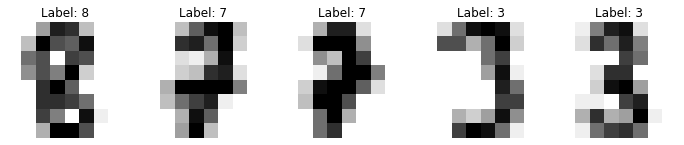

In [1]:
%matplotlib inline

# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function

from sklearn.model_selection import train_test_split

# one-hot representation of labels
labels = to_categorical(labels)

# split into train and test data
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

In [3]:

epochs = 100
batch_size = 100
n_neurons_layer1 = 100
n_neurons_layer2 = 50
n_categories = 10
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
def create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories, eta, lmbd):
    model = Sequential()
    model.add(Dense(n_neurons_layer1, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_neurons_layer2, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_categories, activation='softmax'))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [4]:
DNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        DNN = create_neural_network_keras(n_neurons_layer1, n_neurons_layer2, n_categories,
                                         eta=eta, lmbd=lmbd)
        DNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = DNN.evaluate(X_test, Y_test)
        
        DNN_keras[i][j] = DNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

2021-12-13 08:22:03.283435: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/MortenImac/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-13 08:22:04.114855: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


12/12 [==============================] - 0s 758us/step - loss: 2.4321 - accuracy: 0.1194
Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.119

12/12 [==============================] - 0s 720us/step - loss: 2.5755 - accuracy: 0.1056
Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.106

12/12 [==============================] - 0s 943us/step - loss: 2.6210 - accuracy: 0.1389
Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.139

12/12 [==============================] - 0s 711us/step - loss: 3.8632 - accuracy: 0.1139
Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.114

12/12 [==============================] - 0s 773us/step - loss: 16.8601 - accuracy: 0.1056
Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.106

12/12 [==============================] - 0s 772us/step - loss: 138.4193 - accuracy: 0.0861
Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.086

12/12 [==============================] - 0s 769us/step - loss: 797.1371 - accuracy: 0.0889
Learning r

45/45 [==============================] - 0s 2ms/step - loss: 1441.1381 - accuracy: 0.1044


12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0778


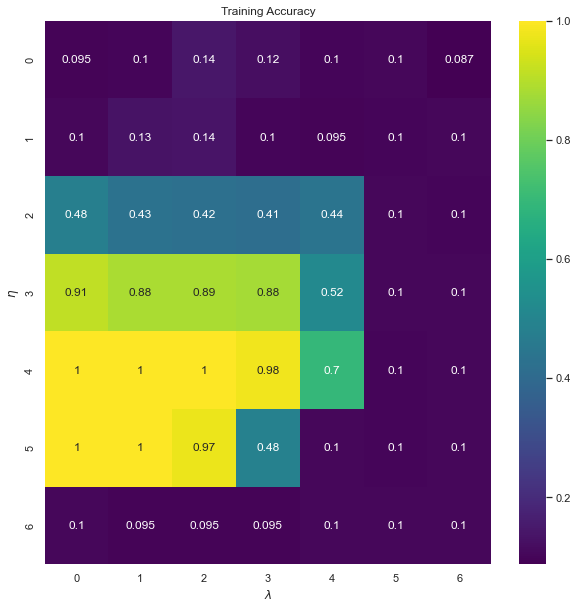

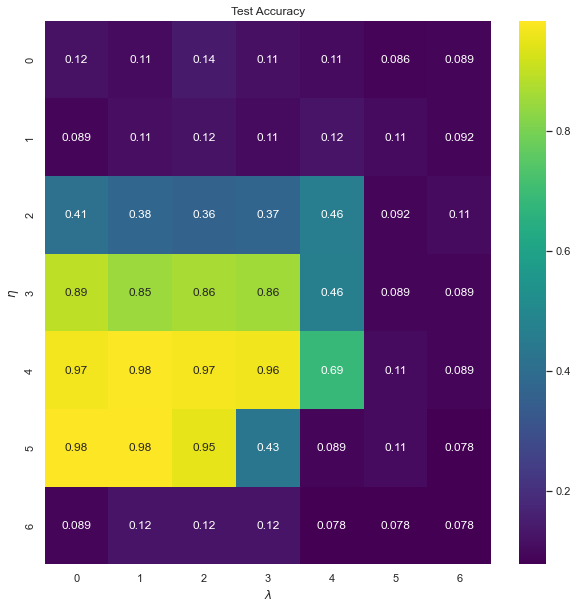

In [5]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        DNN = DNN_keras[i][j]

        train_accuracy[i][j] = DNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = DNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The Breast Cancer Data, now with Keras

In [10]:

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 


"""Load breast cancer dataset"""

np.random.seed(0)        #create same seed for random number every time

cancer=load_breast_cancer()      #Download breast cancer dataset

inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

print('The content of the breast cancer dataset is:')      #Print information about the datasets
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

x=inputs      #Reassign the Feature and Label matrices to other variables
y=outputs

#%% 

# Visualisation of dataset (for correlation analysis)

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean perimeter',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness',fontweight='bold')
plt.ylabel('Mean concavity',fontweight='bold')
plt.show()


plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean texture',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter',fontweight='bold')
plt.ylabel('Mean compactness',fontweight='bold')
plt.show()


# Generate training and testing datasets

#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix

temp1=np.reshape(x[:,1],(len(x[:,1]),1))
temp2=np.reshape(x[:,2],(len(x[:,2]),1))
X=np.hstack((temp1,temp2))      
temp=np.reshape(x[:,5],(len(x[:,5]),1))
X=np.hstack((X,temp))       
temp=np.reshape(x[:,8],(len(x[:,8]),1))
X=np.hstack((X,temp))       

X_train,X_test,y_train,y_test=splitter(X,y,test_size=0.1)   #Split datasets into training and testing

y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)

del temp1,temp2,temp

# %%

# Define tunable parameters"

eta=np.logspace(-3,-1,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update

# %%

"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()
    
plot_data(eta,n_neuron,Train_accuracy, 'training')
plot_data(eta,n_neuron,Test_accuracy, 'testing')

## The Mathematics of Neural Networks

1. Activation functions and vanishing gradients

2. Brief summary of gradient methods

3. Approximation theorems, in particular the *universal approximation theorem* for neural networks by Cybenko and Hornik

I strongly recommend Michael Nielsen's intuitive approach to the neural networks and the universal approximation theorem, see the slides at <http://neuralnetworksanddeeplearning.com/chap4.html>.

## Fine-tuning neural network hyperparameters

The flexibility of neural networks is also one of their main
drawbacks: there are many hyperparameters to tweak. Not only can you
use any imaginable network topology (how neurons/nodes are interconnected),
but even in a simple FFNN you can change the number of layers, the
number of neurons per layer, the type of activation function to use in
each layer, the weight initialization logic, the stochastic gradient optmized and much more. How do you
know what combination of hyperparameters is the best for your task?

* You can use grid search with cross-validation to find the right hyperparameters.

However,since there are many hyperparameters to tune, and since
training a neural network on a large dataset takes a lot of time, you
will only be able to explore a tiny part of the hyperparameter space.

* You can use randomized search.

* Or use tools like [Oscar](http://oscar.calldesk.ai/), which implements more complex algorithms to help you find a good set of hyperparameters quickly.

## Hidden layers

For many problems you can start with just one or two hidden layers and it will work just fine.
For the MNIST data set you ca easily get a high accuracy using just one hidden layer with a
few hundred neurons.
You can reach for this data set above 98% accuracy using two hidden layers with the same total amount of
neurons, in roughly the same amount of training time. 

For more complex problems, you can gradually
ramp up the number of hidden layers, until you start overfitting the training set. Very complex tasks, such
as large image classification or speech recognition, typically require networks with dozens of layers
and they need a huge amount
of training data. However, you will rarely have to train such networks from scratch: it is much more
common to reuse parts of a pretrained state-of-the-art network that performs a similar task.

## Which activation function should I use?

The Back propagation algorithm we derived above works by going from
the output layer to the input layer, propagating the error gradient on
the way. Once the algorithm has computed the gradient of the cost
function with regards to each parameter in the network, it uses these
gradients to update each parameter with a Gradient Descent (GD) step.

Unfortunately for us, the gradients often get smaller and smaller as the
algorithm progresses down to the first hidden layers. As a result, the
GD update leaves the lower layer connection weights
virtually unchanged, and training never converges to a good
solution. This is known in the literature as 
**the vanishing gradients problem**. 

In other cases, the opposite can happen, namely the the gradients can grow bigger and
bigger. The result is that many of the layers get large updates of the 
weights the
algorithm diverges. This is the **exploding gradients problem**, which is
mostly encountered in recurrent neural networks. More generally, deep
neural networks suffer from unstable gradients, different layers may
learn at widely different speeds

## Is the Logistic activation function (Sigmoid)  our choice?

Although this unfortunate behavior has been empirically observed for
quite a while (it was one of the reasons why deep neural networks were
mostly abandoned for a long time), it is only around 2010 that
significant progress was made in understanding it.

A paper titled [Understanding the Difficulty of Training Deep
Feedforward Neural Networks by Xavier Glorot and Yoshua Bengio](http://proceedings.mlr.press/v9/glorot10a.html) found that
the problems with the popular logistic
sigmoid activation function and the weight initialization technique
that was most popular at the time, namely random initialization using
a normal distribution with a mean of 0 and a standard deviation of
1. 

They showed that with this activation function and this
initialization scheme, the variance of the outputs of each layer is
much greater than the variance of its inputs. Going forward in the
network, the variance keeps increasing after each layer until the
activation function saturates at the top layers. This is actually made
worse by the fact that the logistic function has a mean of 0.5, not 0
(the hyperbolic tangent function has a mean of 0 and behaves slightly
better than the logistic function in deep networks).

## The derivative of the Logistic funtion

Looking at the logistic activation function, when inputs become large
(negative or positive), the function saturates at 0 or 1, with a
derivative extremely close to 0. Thus when backpropagation kicks in,
it has virtually no gradient to propagate back through the network,
and what little gradient exists keeps getting diluted as
backpropagation progresses down through the top layers, so there is
really nothing left for the lower layers.

In their paper, Glorot and Bengio propose a way to significantly
alleviate this problem. We need the signal to flow properly in both
directions: in the forward direction when making predictions, and in
the reverse direction when backpropagating gradients. We don’t want
the signal to die out, nor do we want it to explode and saturate. For
the signal to flow properly, the authors argue that we need the
variance of the outputs of each layer to be equal to the variance of
its inputs, and we also need the gradients to have equal variance
before and after flowing through a layer in the reverse direction.

One of the insights in the 2010 paper by Glorot and Bengio was that
the vanishing/exploding gradients problems were in part due to a poor
choice of activation function. Until then most people had assumed that
if Nature had chosen to use roughly sigmoid activation functions in
biological neurons, they must be an excellent choice. But it turns out
that other activation functions behave much better in deep neural
networks, in particular the ReLU activation function, mostly because
it does not saturate for positive values (and also because it is quite
fast to compute).

## The RELU function family

The ReLU activation function suffers from a problem known as the dying
ReLUs: during training, some neurons effectively die, meaning they
stop outputting anything other than 0.

In some cases, you may find that half of your network’s neurons are
dead, especially if you used a large learning rate. During training,
if a neuron’s weights get updated such that the weighted sum of the
neuron’s inputs is negative, it will start outputting 0. When this
happen, the neuron is unlikely to come back to life since the gradient
of the ReLU function is 0 when its input is negative.

To solve this problem, nowadays practitioners use a  variant of the ReLU
function, such as the leaky ReLU discussed above or the so-called
exponential linear unit (ELU) function

$$
ELU(z) = \left\{\begin{array}{cc} \alpha\left( \exp{(z)}-1\right) & z < 0,\\  z & z \ge 0.\end{array}\right.
$$

## Which activation function should we use?

In general it seems that the ELU activation function is better than
the leaky ReLU function (and its variants), which is better than
ReLU. ReLU performs better than $\tanh$ which in turn performs better
than the logistic function. 

If runtime
performance is an issue, then you may opt for the  leaky ReLU function  over the 
ELU function If you don’t
want to tweak yet another hyperparameter, you may just use the default
$\alpha$ of $0.01$ for the leaky ReLU, and $1$ for ELU. If you have
spare time and computing power, you can use cross-validation or
bootstrap to evaluate other activation functions.

## More on activation functions, output layers

In most cases you can use the ReLU activation function in the hidden layers (or one of its variants).

It is a bit faster to compute than other activation functions, and the gradient descent optimization does in general not get stuck.

**For the output layer:**

* For classification the softmax activation function is generally a good choice for classification tasks (when the classes are mutually exclusive).

* For regression tasks, you can simply use no activation function at all.

## Batch Normalization

Batch Normalization
aims to address the vanishing/exploding gradients problems, and more generally the problem that the
distribution of each layer’s inputs changes during training, as the parameters of the previous layers change.

The technique consists of adding an operation in the model just before the activation function of each
layer, simply zero-centering and normalizing the inputs, then scaling and shifting the result using two new
parameters per layer (one for scaling, the other for shifting). In other words, this operation lets the model
learn the optimal scale and mean of the inputs for each layer.
In order to zero-center and normalize the inputs, the algorithm needs to estimate the inputs’ mean and
standard deviation. It does so by evaluating the mean and standard deviation of the inputs over the current
mini-batch, from this the name batch normalization.

## Dropout

It is a fairly simple algorithm: at every training step, every neuron (including the input neurons but
excluding the output neurons) has a probability $p$ of being temporarily dropped out, meaning it will be
entirely ignored during this training step, but it may be active during the next step.

The
hyperparameter $p$ is called the dropout rate, and it is typically set to 50%. After training, the neurons are not dropped anymore.
 It is viewed as one of the most popular regularization techniques.

## Gradient Clipping

A popular technique to lessen the exploding gradients problem is to simply clip the gradients during
backpropagation so that they never exceed some threshold (this is mostly useful for recurrent neural
networks).

This technique is called Gradient Clipping.

In general however, Batch
Normalization is preferred.

## A very nice website on Neural Networks

You may find this [website](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.29243&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) very useful. Thx a million to Ghadi for sharing.

## A top-down perspective on Neural networks

The first thing we would like to do is divide the data into two or three
parts. A training set, a validation or dev (development) set, and a
test set. The test set is the data on which we want to make
predictions. The dev set is a subset of the training data we use to
check how well we are doing out-of-sample, after training the model on
the training dataset. We use the validation error as a proxy for the
test error in order to make tweaks to our model. It is crucial that we
do not use any of the test data to train the algorithm. This is a
cardinal sin in ML. Then:

* Estimate optimal error rate

* Minimize underfitting (bias) on training data set.

* Make sure you are not overfitting.

If the validation and test sets are drawn from the same distributions,
then a good performance on the validation set should lead to similarly
good performance on the test set. 

However, sometimes
the training data and test data differ in subtle ways because, for
example, they are collected using slightly different methods, or
because it is cheaper to collect data in one way versus another. In
this case, there can be a mismatch between the training and test
data. This can lead to the neural network overfitting these small
differences between the test and training sets, and a poor performance
on the test set despite having a good performance on the validation
set. To rectify this, Andrew Ng suggests making two validation or dev
sets, one constructed from the training data and one constructed from
the test data. The difference between the performance of the algorithm
on these two validation sets quantifies the train-test mismatch. This
can serve as another important diagnostic when using DNNs for
supervised learning.

## Limitations of supervised learning with deep networks

Like all statistical methods, supervised learning using neural
networks has important limitations. This is especially important when
one seeks to apply these methods, especially to physics problems. Like
all tools, DNNs are not a universal solution. Often, the same or
better performance on a task can be achieved by using a few
hand-engineered features (or even a collection of random
features). 

Here we list some of the important limitations of supervised neural network based models. 

* **Need labeled data**. All supervised learning methods, DNNs for supervised learning require labeled data. Often, labeled data is harder to acquire than unlabeled data (e.g. one must pay for human experts to label images).

* **Supervised neural networks are extremely data intensive.** DNNs are data hungry. They perform best when data is plentiful. This is doubly so for supervised methods where the data must also be labeled. The utility of DNNs is extremely limited if data is hard to acquire or the datasets are small (hundreds to a few thousand samples). In this case, the performance of other methods that utilize hand-engineered features can exceed that of DNNs.

* **Homogeneous data.** Almost all DNNs deal with homogeneous data of one type. It is very hard to design architectures that mix and match data types (i.e. some continuous variables, some discrete variables, some time series). In applications beyond images, video, and language, this is often what is required. In contrast, ensemble models like random forests or gradient-boosted trees have no difficulty handling mixed data types.

* **Many problems are not about prediction.** In natural science we are often interested in learning something about the underlying distribution that generates the data. In this case, it is often difficult to cast these ideas in a supervised learning setting. While the problems are related, it is possible to make good predictions with a *wrong* model. The model might or might not be useful for understanding the underlying science.

Some of these remarks are particular to DNNs, others are shared by all supervised learning methods. This motivates the use of unsupervised methods which in part circumvent these problems.

## Overarching Views, a personal  note

The author of these lecture notes has an overarching take on many of
the machine learning algorithms we discuss here. 

If we wish to understand complex systems, we need to find some
effective degrees of freedom or features that we find essential,
simply in order to reduce the complexity of the systems we are
studying.  This leads, in one way or the other to dimensionality
reductions. Most of the Machine Learning methods we encounter deal
with this, whether we opt for a principal component analysis, or
clustering, or convolutional neural networks, or Ridge or Lasso
regression or random forest, yes, perhaps most machine learning
methods at large.

For neural networks and our previous discussion, we have seen that we
in essence end up with matrix-matrix and matrix-vector
multiplications. In all cases, our matrices are dense ones, and the
more data we deal with the larger the dimensionalities of the matrices
and vectors. How can we reduce such dimensionalities?  One possible
answer is offered by **convolutional neural networks** (CNN), as
discussed below. The figure here shows a typical situation of the
reduction of information in an image and is typical of what CNNs
actually end up doing.

## Convolutional Neural Networks (recognizing images)

Convolutional neural networks (CNNs) were developed during the last
decade of the previous century, with a focus on character recognition
tasks. Nowadays, CNNs are a central element in the spectacular success
of deep learning methods. The success in for example image
classifications have made them a central tool for most machine
learning practitioners.

CNNs are very similar to ordinary Neural Networks.
They are made up of neurons that have learnable weights and
biases. Each neuron receives some inputs, performs a dot product and
optionally follows it with a non-linearity. The whole network still
expresses a single differentiable score function: from the raw image
pixels on one end to class scores at the other. And they still have a
loss function (for example Softmax) on the last (fully-connected) layer
and all the tips/tricks we developed for learning regular Neural
Networks still apply (back propagation, gradient descent etc etc).

## What is the Difference

**CNN architectures make the explicit assumption that
the inputs are images, which allows us to encode certain properties
into the architecture. These then make the forward function more
efficient to implement and vastly reduce the amount of parameters in
the network.**

Here we provide only a superficial overview, for the more interested, we recommend highly the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/).

Another good read is the article here <https://arxiv.org/pdf/1603.07285.pdf>.

## Neural Networks vs CNNs

Neural networks are defined as **affine transformations**, that is 
a vector is received as input and is multiplied with a matrix of so-called weights (our unknown paramters) to produce an
output (to which a bias vector is usually added before passing the result
through a nonlinear activation function). This is applicable to any type of input, be it an
image, a sound clip or an unordered collection of features: whatever their
dimensionality, their representation can always be flattened into a vector
before the transformation.

## Why CNNS for images, sound files, medical images from CT scans etc?

However, when we consider images, sound clips and many other similar kinds of data, these data  have an intrinsic
structure. More formally, they share these important properties:
* They are stored as multi-dimensional arrays (think of the pixels of a figure) .

* They feature one or more axes for which ordering matters (e.g., width and height axes for an image, time axis for a sound clip).

* One axis, called the channel axis, is used to access different views of the data (e.g., the red, green and blue channels of a color image, or the left and right channels of a stereo audio track).

These properties are not exploited when an affine transformation is applied; in
fact, all the axes are treated in the same way and the topological information
is not taken into account. Still, taking advantage of the implicit structure of
the data may prove very handy in solving some tasks, like computer vision and
speech recognition, and in these cases it would be best to preserve it. This is
where discrete convolutions come into play.

A discrete convolution is a linear transformation that preserves this notion of
ordering. It is sparse (only a few input units contribute to a given output
unit) and reuses parameters (the same weights are applied to multiple locations
in the input).

## Regular NNs don’t scale well to full images

As an example, consider
an image of size $32\times 32\times 3$ (32 wide, 32 high, 3 color channels), so a
single fully-connected neuron in a first hidden layer of a regular
Neural Network would have $32\times 32\times 3 = 3072$ weights. This amount still
seems manageable, but clearly this fully-connected structure does not
scale to larger images. For example, an image of more respectable
size, say $200\times 200\times 3$, would lead to neurons that have 
$200\times 200\times 3 = 120,000$ weights. 

We could have
several such neurons, and the parameters would add up quickly! Clearly,
this full connectivity is wasteful and the huge number of parameters
would quickly lead to possible overfitting.

<!-- dom:FIGURE: [figslides/nn.jpeg, width=500 frac=0.6]  A regular 3-layer Neural Network. -->
<!-- begin figure -->

<img src="figslides/nn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A regular 3-layer Neural Network.</i></p>
<!-- end figure -->

## 3D volumes of neurons

Convolutional Neural Networks take advantage of the fact that the
input consists of images and they constrain the architecture in a more
sensible way. 

In particular, unlike a regular Neural Network, the
layers of a CNN have neurons arranged in 3 dimensions: width,
height, depth. (Note that the word depth here refers to the third
dimension of an activation volume, not to the depth of a full Neural
Network, which can refer to the total number of layers in a network.)

To understand it better, the above example of an image 
with an input volume of
activations has dimensions $32\times 32\times 3$ (width, height,
depth respectively). 

The neurons in a layer will
only be connected to a small region of the layer before it, instead of
all of the neurons in a fully-connected manner. Moreover, the final
output layer could  for this specific image have dimensions $1\times 1 \times 10$, 
because by the
end of the CNN architecture we will reduce the full image into a
single vector of class scores, arranged along the depth
dimension. 

<!-- dom:FIGURE: [figslides/cnn.jpeg, width=500 frac=0.6]  A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels). -->
<!-- begin figure -->

<img src="figslides/cnn.jpeg" width="500"><p style="font-size: 0.9em"><i>Figure 1: A CNN arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers. Every layer of a CNN transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).</i></p>
<!-- end figure -->

## Layers used to build CNNs

A simple CNN is a sequence of layers, and every layer of a CNN
transforms one volume of activations to another through a
differentiable function. We use three main types of layers to build
CNN architectures: Convolutional Layer, Pooling Layer, and
Fully-Connected Layer (exactly as seen in regular Neural Networks). We
will stack these layers to form a full CNN architecture.

A simple CNN for image classification could have the architecture:

* **INPUT** ($32\times 32 \times 3$) will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.

* **CONV** (convolutional )layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as $[32\times 32\times 12]$ if we decided to use 12 filters.

* **RELU** layer will apply an elementwise activation function, such as the $max(0,x)$ thresholding at zero. This leaves the size of the volume unchanged ($[32\times 32\times 12]$).

* **POOL** (pooling) layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as $[16\times 16\times 12]$.

* **FC** (i.e. fully-connected) layer will compute the class scores, resulting in volume of size $[1\times 1\times 10]$, where each of the 10 numbers correspond to a class score, such as among the 10 categories of the MNIST images we considered above . As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Transforming images

CNNs transform the original image layer by layer from the original
pixel values to the final class scores. 

Observe that some layers contain
parameters and other don’t. In particular, the CNN layers perform
transformations that are a function of not only the activations in the
input volume, but also of the parameters (the weights and biases of
the neurons). On the other hand, the RELU/POOL layers will implement a
fixed function. The parameters in the CONV/FC layers will be trained
with gradient descent so that the class scores that the CNN computes
are consistent with the labels in the training set for each image.

## CNNs in brief

In summary:

* A CNN architecture is in the simplest case a list of Layers that transform the image volume into an output volume (e.g. holding the class scores)

* There are a few distinct types of Layers (e.g. CONV/FC/RELU/POOL are by far the most popular)

* Each Layer accepts an input 3D volume and transforms it to an output 3D volume through a differentiable function

* Each Layer may or may not have parameters (e.g. CONV/FC do, RELU/POOL don’t)

* Each Layer may or may not have additional hyperparameters (e.g. CONV/FC/POOL do, RELU doesn’t)

For more material on convolutional networks, we strongly recommend
the course
[IN5400 – Machine Learning for Image Analysis](https://www.uio.no/studier/emner/matnat/ifi/IN5400/index-eng.html)
and the slides of [CS231](http://cs231n.github.io/convolutional-networks/) which is taught at Stanford University (consistently ranked as one of the top computer science programs in the world). [Michael Nielsen's book is a must read, in particular chapter 6 which deals with CNNs](http://neuralnetworksanddeeplearning.com/chap6.html).

The textbook by Goodfellow et al, see chapter 9 contains an in depth discussion as well.

## Key Idea

A dense neural network is representd by an affine operation (like matrix-matrix multiplication) where all parameters are included.

The key idea in CNNs for say imaging is that in images neighbor pixels tend to be related! So we connect
only neighboring neurons in the input instead of connecting all with the first hidden layer.

We say we perform a filtering (convolution is the mathematical operation).

## Mathematics of CNNs

The mathematics of CNNs is based on the mathematical operation of
**convolution**.  In mathematics (in particular in functional analysis),
convolution is represented by matheematical operation (integration,
summation etc) on two function in order to produce a third function
that expresses how the shape of one gets modified by the other.
Convolution has a plethora of applications in a variety of disciplines, spanning from statistics to signal processing, computer vision, solutions of differential equations,linear algebra, engineering,  and yes, machine learning.

Mathematically, convolution is defined as follows (one-dimensional example):
Let us define a continuous function $y(t)$ given by

$$
y(t) = \int x(a) w(t-a) da,
$$

where $x(a)$ represents a so-called input and $w(t-a)$ is normally called the weight function or kernel.

The above integral is written in  a more compact form as

$$
y(t) = \left(x * w\right)(t).
$$

The discretized version reads

$$
y(t) = \sum_{a=-\infty}^{a=\infty}x(a)w(t-a).
$$

Computing the inverse of the above convolution operations is known as deconvolution.

How can we use this? And what does it mean? Let us study some familiar examples first.

## Convolution Examples: Polynomial multiplication

We have already met such an example in project 1 when we tried to set
up the design matrix for a two-dimensional function. This was an
example of polynomial multiplication.  Let us recast such a problem in terms of the convolution operation.
Let us look a the following polynomials to second and third order, respectively:

$$
p(t) = \alpha_0+\alpha_1 t+\alpha_2 t^2,
$$

and

$$
s(t) = \beta_0+\beta_1 t+\beta_2 t^2+\beta_3 t^3.
$$

The polynomial multiplication gives us a new polynomial of degree $5$

$$
z(t) = \delta_0+\delta_1 t+\delta_2 t^2+\delta_3 t^3+\delta_4 t^4+\delta_5 t^5.
$$

## Efficient Polynomial Multiplication

Computing polynomial products can be implemented efficiently if we rewrite the more brute force multiplications using convolution.
We note first that the new coefficients are given as

$$
\begin{split}
\delta_0=&\alpha_0\beta_0\\
\delta_1=&\alpha_1\beta_0+\alpha_1\beta_0\\
\delta_2=&\alpha_0\beta_2+\alpha_1\beta_1+\alpha_2\beta_0\\
\delta_3=&\alpha_1\beta_2+\alpha_2\beta_1+\alpha_0\beta_3\\
\delta_4=&\alpha_2\beta_2+\alpha_1\beta_3\\
\delta_5=&\alpha_2\beta_3.\\
\end{split}
$$

We note that $\alpha_i=0$ except for $i\in \left\{0,1,2\right\}$ and $\beta_i=0$ except for $i\in\left\{0,1,2,3\right\}$.

We can then rewrite the coefficients $\delta_j$ using a discrete convolution as

$$
\delta_j = \sum_{i=-\infty}^{i=\infty}\alpha_i\beta_{j-i}=(\alpha * \beta)_j,
$$

or as a double sum with restriction $l=i+j$

$$
\delta_l = \sum_{ij}\alpha_i\beta_{j}.
$$

Do you see a potential drawback with these equations?

## A more efficient way of coding the above Convolution

Since we only have a finite number of $\alpha$ and $\beta$ values
which are non-zero, we can rewrite the above convolution expressions
as a matrix-vector multiplication

$$
\boldsymbol{\delta}=\begin{bmatrix}\alpha_0 & 0 & 0 & 0 \\
                            \alpha_1 & \alpha_0 & 0 & 0 \\
			    \alpha_2 & \alpha_1 & \alpha_0 & 0 \\
			    0 & \alpha_2 & \alpha_1 & \alpha_0 \\
			    0 & 0 & \alpha_2 & \alpha_1 \\
			    0 & 0 & 0 & \alpha_2
			    \end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3\end{bmatrix}.
$$

The process is commutative and we can easily see that we can rewrite the multiplication in terms of  a matrix holding $\beta$ and a vector holding $\alpha$.
In this case we have

$$
\boldsymbol{\delta}=\begin{bmatrix}\beta_0 & 0 & 0  \\
                            \beta_1 & \beta_0 & 0  \\
			    \beta_2 & \beta_1 & \beta_0  \\
			    \beta_3 & \beta_2 & \beta_1 \\
			    0 & \beta_3 & \beta_2 \\
			    0 & 0 & \beta_3
			    \end{bmatrix}\begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2\end{bmatrix}.
$$

Note that the use of these  matrices is for mathematical purposes only  and not implementation purposes.
When implementing the above equation we do not encode (and allocate memory) the matrices explicitely.
We rather code the convolutions in the minimal memory footprint that they require.

Does the number of floating point operations change here when we use the commutative property?

## Convolution Examples: Principle of Superposition and Periodic Forces (Fourier Transforms)

For problems with so-called harmonic oscillations, given by for example the following differential equation

$$
m\frac{d^2x}{dt^2}+\eta\frac{dx}{dt}+x(t)=F(t),
$$

where $F(t)$ is an applied external force acting on the system (often called a driving force), one can use the theory of Fourier transformations to find the solutions of this type of equations.

If one has several driving forces, $F(t)=\sum_n F_n(t)$, one can find
the particular solution to each $F_n$, $x_{pn}(t)$, and the particular
solution for the entire driving force is then given by a series like

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
x_p(t)=\sum_nx_{pn}(t).
\label{_auto1} \tag{1}
\end{equation}
$$

## Principle of Superposition

This is known as the principle of superposition. It only applies when
the homogenous equation is linear. If there were an anharmonic term
such as $x^3$ in the homogenous equation, then when one summed various
solutions, $x=(\sum_n x_n)^2$, one would get cross
terms. Superposition is especially useful when $F(t)$ can be written
as a sum of sinusoidal terms, because the solutions for each
sinusoidal (sine or cosine)  term is analytic. 

Driving forces are often periodic, even when they are not
sinusoidal. Periodicity implies that for some time $\tau$

$$
\begin{eqnarray}
F(t+\tau)=F(t). 
\end{eqnarray}
$$

One example of a non-sinusoidal periodic force is a square wave. Many
components in electric circuits are non-linear, e.g. diodes, which
makes many wave forms non-sinusoidal even when the circuits are being
driven by purely sinusoidal sources.

## Simple Code Example

The code here shows a typical example of such a square wave generated using the functionality included in the **scipy** Python package. We have used a period of $\tau=0.2$.

In [11]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t)
plt.plot(t, SqrSignal)
plt.ylim(-0.5, 2.5)
plt.show()

For the sinusoidal example the
period is $\tau=2\pi/\omega$. However, higher harmonics can also
satisfy the periodicity requirement. In general, any force that
satisfies the periodicity requirement can be expressed as a sum over
harmonics,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
F(t)=\frac{f_0}{2}+\sum_{n>0} f_n\cos(2n\pi t/\tau)+g_n\sin(2n\pi t/\tau).
\label{_auto2} \tag{2}
\end{equation}
$$

## Wrapping up Fourier transforms

We can write down the answer for
$x_{pn}(t)$, by substituting $f_n/m$ or $g_n/m$ for $F_0/m$. By
writing each factor $2n\pi t/\tau$ as $n\omega t$, with $\omega\equiv
2\pi/\tau$,

<!-- Equation labels as ordinary links -->
<div id="eq:fourierdef1"></div>

$$
\begin{equation}
\label{eq:fourierdef1} \tag{3}
F(t)=\frac{f_0}{2}+\sum_{n>0}f_n\cos(n\omega t)+g_n\sin(n\omega t).
\end{equation}
$$

The solutions for $x(t)$ then come from replacing $\omega$ with
$n\omega$ for each term in the particular solution,

$$
\begin{eqnarray}
x_p(t)&=&\frac{f_0}{2k}+\sum_{n>0} \alpha_n\cos(n\omega t-\delta_n)+\beta_n\sin(n\omega t-\delta_n),\\
\nonumber
\alpha_n&=&\frac{f_n/m}{\sqrt{((n\omega)^2-\omega_0^2)+4\beta^2n^2\omega^2}},\\
\nonumber
\beta_n&=&\frac{g_n/m}{\sqrt{((n\omega)^2-\omega_0^2)+4\beta^2n^2\omega^2}},\\
\nonumber
\delta_n&=&\tan^{-1}\left(\frac{2\beta n\omega}{\omega_0^2-n^2\omega^2}\right).
\end{eqnarray}
$$

## Finding the Coefficients

Because the forces have been applied for a long time, any non-zero
damping eliminates the homogenous parts of the solution, so one need
only consider the particular solution for each $n$.

The problem is considered solved if one can find expressions for the
coefficients $f_n$ and $g_n$, even though the solutions are expressed
as an infinite sum. The coefficients can be extracted from the
function $F(t)$ by

<!-- Equation labels as ordinary links -->
<div id="eq:fourierdef2"></div>

$$
\begin{eqnarray}
\label{eq:fourierdef2} \tag{4}
f_n&=&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~F(t)\cos(2n\pi t/\tau),\\
\nonumber
g_n&=&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~F(t)\sin(2n\pi t/\tau).
\end{eqnarray}
$$

To check the consistency of these expressions and to verify
Eq. ([4](#eq:fourierdef2)), one can insert the expansion of $F(t)$ in
Eq. ([3](#eq:fourierdef1)) into the expression for the coefficients in
Eq. ([4](#eq:fourierdef2)) and see whether

$$
\begin{eqnarray}
f_n&=?&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~\left\{
\frac{f_0}{2}+\sum_{m>0}f_m\cos(m\omega t)+g_m\sin(m\omega t)
\right\}\cos(n\omega t).
\end{eqnarray}
$$

Immediately, one can throw away all the terms with $g_m$ because they
convolute an even and an odd function. The term with $f_0/2$
disappears because $\cos(n\omega t)$ is equally positive and negative
over the interval and will integrate to zero. For all the terms
$f_m\cos(m\omega t)$ appearing in the sum, one can use angle addition
formulas to see that $\cos(m\omega t)\cos(n\omega
t)=(1/2)(\cos[(m+n)\omega t]+\cos[(m-n)\omega t]$. This will integrate
to zero unless $m=n$. In that case the $m=n$ term gives

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\int_{-\tau/2}^{\tau/2}dt~\cos^2(m\omega t)=\frac{\tau}{2},
\label{_auto3} \tag{5}
\end{equation}
$$

and

$$
\begin{eqnarray}
f_n&=?&\frac{2}{\tau}\int_{-\tau/2}^{\tau/2} dt~f_n/2\\
\nonumber
&=&f_n~\checkmark.
\end{eqnarray}
$$

The same method can be used to check for the consistency of $g_n$.

## Final words on Fourier Transforms

The code here uses the Fourier series applied to a 
square wave signal. The code here
visualizes the various approximations given by Fourier series compared
with a square wave with period $T=0.2$ (dimensionless time), width $0.1$ and max value of the force $F=2$. We
see that when we increase the number of components in the Fourier
series, the Fourier series approximation gets closer and closer to the
square wave signal.

In [12]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt

# number of points                                                                                       
n = 500
# start and final times                                                                                  
t0 = 0.0
tn = 1.0
# Period                                                                                                 
T =0.2
# Max value of square signal                                                                             
Fmax= 2.0
# Width of signal   
Width = 0.1
t = np.linspace(t0, tn, n, endpoint=False)
SqrSignal = np.zeros(n)
FourierSeriesSignal = np.zeros(n)
SqrSignal = 1.0+signal.square(2*np.pi*5*t+np.pi*Width/T)
a0 = Fmax*Width/T
FourierSeriesSignal = a0
Factor = 2.0*Fmax/np.pi
for i in range(1,500):
    FourierSeriesSignal += Factor/(i)*np.sin(np.pi*i*Width/T)*np.cos(i*t*2*np.pi/T)
plt.plot(t, SqrSignal)
plt.plot(t, FourierSeriesSignal)
plt.ylim(-0.5, 2.5)
plt.show()

## Two-dimensional Objects

We often use convolutions over more than one dimension at a time. If
we have a two-dimensional image $I$ as input, we can have a **filter**
defined by a two-dimensional **kernel** $K$. This leads to an output $S$

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(m,n)K(i-m,j-n).
$$

Convolution is a commutatitave process, which means we can rewrite this equation as

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(i-m,j-n)K(m,n).
$$

Normally the latter is more straightforward to implement in  a machine elarning library since there is less variation in the range of values of $m$ and $n$.

## Cross-Correlation

Many deep learning libraries implement cross-correlation instead of convolution

$$
S_(i,j)=(I * K)(i,j) = \sum_m\sum_n I(i+m,j-+)K(m,n).
$$

## More on Dimensionalities

In feilds like signal processing (and imaging as well), one designs
so-called filters. These filters are defined by the convolutions and
are often hand-crafted. One may specify filters for smoothing, edge
detection, frequency reshaping, and similar operations. However with
neural networks the idea is to automatically learn the filters and use
many of them in conjunction with non-linear operations (activation
functions).

As an example consider a neural network operating on sound sequence
data.  Assume that we an input vector $\boldsymbol{x}$ of length $d=10^6$.  We
construct then a neural network with onle hidden layer only with
$10^4$ nodes. This means that we will have a weight matrix with
$10^4\times 10^6=10^{10}$ weights to be determined, together with $10^4$ biases.

Assume furthermore that we have an output layer which is meant to train whether the sound sequence represents a human voice (true) or something else (false).
It means that we have only one output node. But since this output node connects to $10^4$ nodes in the hidden layer, there are in total $10^4$ weights to be determined for the output layer, plus one bias. In total we have

$$
\mathrm{NumberParameters}=10^{10}+10^4+10^4+1 \approx 10^{10},
$$

that is ten billion parameters to determine.

## Further Dimensionality Remarks

In today’s architecture one can train such neural networks, however
this is a huge number of parameters for the task at hand. In general,
it is a very wasteful and inefficient use of dense matrices as
parameters. Just as importantly, such trained network parameters are
very specific for the type of input data on which they were trained
and the network is not likely to generalize easily to variations in
the input.

The main principles that justify convolutions is locality of
information and repetion of patterns within the signal. Sound samples
of the input in adjacent spots are much more likely to affect each
other than those that are very far away. Similarly, sounds are
repeated in multiple times in the signal. While slightly simplistic,
reasoning about such a sound example demonstrates this. The same
principles then apply to images and other similar data.

## CNNs in more detail, Lecture from IN5400

* [Lectures from IN5400 spring 2019](https://www.uio.no/studier/emner/matnat/ifi/IN5400/v19/material/week5/in5400_2019_week5_convolutional_nerual_networks.pdf)

## CNNs in more detail, building convolutional neural networks in Tensorflow and Keras

As discussed above, CNNs are neural networks built from the assumption that the inputs
to the network are 2D images. This is important because the number of features or pixels in images
grows very fast with the image size, and an enormous number of weights and biases are needed in order to build an accurate network.  

As before, we still have our input, a hidden layer and an output. What's novel about convolutional networks
are the **convolutional** and **pooling** layers stacked in pairs between the input and the hidden layer.
In addition, the data is no longer represented as a 2D feature matrix, instead each input is a number of 2D
matrices, typically 1 for each color dimension (Red, Green, Blue).

## Setting it up

It means that to represent the entire
dataset of images, we require a 4D matrix or **tensor**. This tensor has the dimensions:

$$
(n_{inputs},\, n_{pixels, width},\, n_{pixels, height},\, depth) .
$$

## The MNIST dataset again

The MNIST dataset consists of grayscale images with a pixel size of
$28\times 28$, meaning we require $28 \times 28 = 724$ weights to each
neuron in the first hidden layer.

If we were to analyze images of size $128\times 128$ we would require
$128 \times 128 = 16384$ weights to each neuron. Even worse if we were
dealing with color images, as most images are, we have an image matrix
of size $128\times 128$ for each color dimension (Red, Green, Blue),
meaning 3 times the number of weights $= 49152$ are required for every
single neuron in the first hidden layer.

## Strong correlations

Images typically have strong local correlations, meaning that a small
part of the image varies little from its neighboring regions. If for
example we have an image of a blue car, we can roughly assume that a
small blue part of the image is surrounded by other blue regions.

Therefore, instead of connecting every single pixel to a neuron in the
first hidden layer, as we have previously done with deep neural
networks, we can instead connect each neuron to a small part of the
image (in all 3 RGB depth dimensions).  The size of each small area is
fixed, and known as a [receptive](https://en.wikipedia.org/wiki/Receptive_field).

## Layers of a CNN
The layers of a convolutional neural network arrange neurons in 3D: width, height and depth.  
The input image is typically a square matrix of depth 3. 

A **convolution** is performed on the image which outputs
a 3D volume of neurons. The weights to the input are arranged in a number of 2D matrices, known as **filters**.

Each filter slides along the input image, taking the dot product
between each small part of the image and the filter, in all depth
dimensions. This is then passed through a non-linear function,
typically the **Rectified Linear (ReLu)** function, which serves as the
activation of the neurons in the first convolutional layer. This is
further passed through a **pooling layer**, which reduces the size of the
convolutional layer, e.g. by taking the maximum or average across some
small regions, and this serves as input to the next convolutional
layer.

## Systematic reduction

By systematically reducing the size of the input volume, through
convolution and pooling, the network should create representations of
small parts of the input, and then from them assemble representations
of larger areas.  The final pooling layer is flattened to serve as
input to a hidden layer, such that each neuron in the final pooling
layer is connected to every single neuron in the hidden layer. This
then serves as input to the output layer, e.g. a softmax output for
classification.

## Prerequisites: Collect and pre-process data

inputs = (n_inputs, pixel_width, pixel_height, depth) = (1797, 8, 8, 1)
labels = (n_inputs) = (1797,)


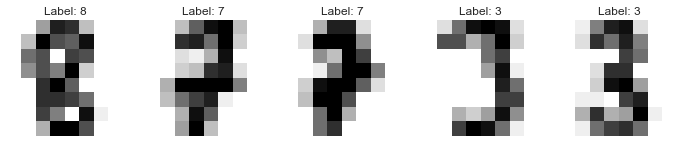

In [6]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# ensure the same random numbers appear every time
np.random.seed(0)

# display images in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)


# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# RGB images have a depth of 3
# our images are grayscale so they should have a depth of 1
inputs = inputs[:,:,:,np.newaxis]

print("inputs = (n_inputs, pixel_width, pixel_height, depth) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# choose some random images to display
n_inputs = len(inputs)
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()

## Importing Keras and Tensorflow

In [7]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
#from tensorflow.keras import Conv2D
#from tensorflow.keras import MaxPooling2D
#from tensorflow.keras import Flatten

from sklearn.model_selection import train_test_split

# representation of labels
labels = to_categorical(labels)

# split into train and test data
# one-liner from scikit-learn library
train_size = 0.8
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

## Running with Keras

In [8]:
def create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd):
    model = Sequential()
    model.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(n_neurons_connected, activation='relu', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.Dense(n_categories, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    sgd = optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

epochs = 100
batch_size = 100
input_shape = X_train.shape[1:4]
receptive_field = 3
n_filters = 10
n_neurons_connected = 50
n_categories = 10

eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)

## Final part

In [9]:
CNN_keras = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
        
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = create_convolutional_neural_network_keras(input_shape, receptive_field,
                                              n_filters, n_neurons_connected, n_categories,
                                              eta, lmbd)
        CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        scores = CNN.evaluate(X_test, Y_test)
        
        CNN_keras[i][j] = CNN
        
        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print()

/Users/MortenImac/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


12/12 [==============================] - 0s 1ms/step - loss: 2.8359 - accuracy: 0.1278
Learning rate =  1e-05
Lambda =  1e-05
Test accuracy: 0.128

12/12 [==============================] - 0s 1ms/step - loss: 2.9219 - accuracy: 0.1139
Learning rate =  1e-05
Lambda =  0.0001
Test accuracy: 0.114

12/12 [==============================] - 0s 1ms/step - loss: 3.3238 - accuracy: 0.1139
Learning rate =  1e-05
Lambda =  0.001
Test accuracy: 0.114

12/12 [==============================] - 0s 1ms/step - loss: 3.6824 - accuracy: 0.1222
Learning rate =  1e-05
Lambda =  0.01
Test accuracy: 0.122

12/12 [==============================] - 0s 1ms/step - loss: 12.5559 - accuracy: 0.1444
Learning rate =  1e-05
Lambda =  0.1
Test accuracy: 0.144

12/12 [==============================] - 0s 1ms/step - loss: 90.7983 - accuracy: 0.0444
Learning rate =  1e-05
Lambda =  1.0
Test accuracy: 0.044

12/12 [==============================] - 0s 2ms/step - loss: 519.4904 - accuracy: 0.0583
Learning rate =  1e-05
La

## Final visualization

12/12 [==============================] - 0s 949us/step - loss: 2.4010 - accuracy: 0.1056


12/12 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0778


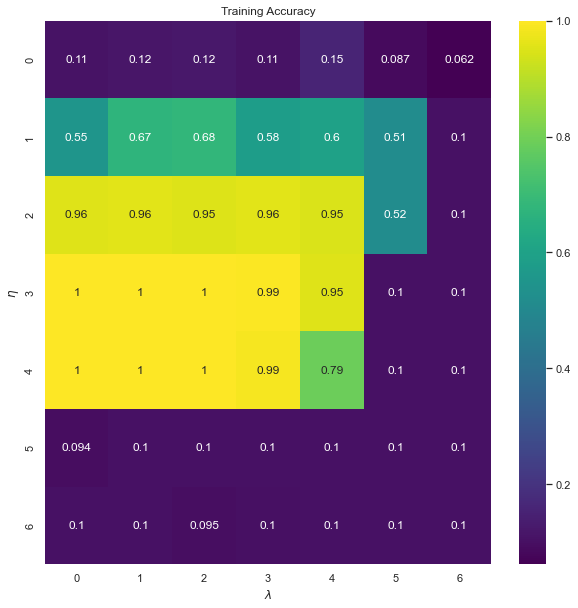

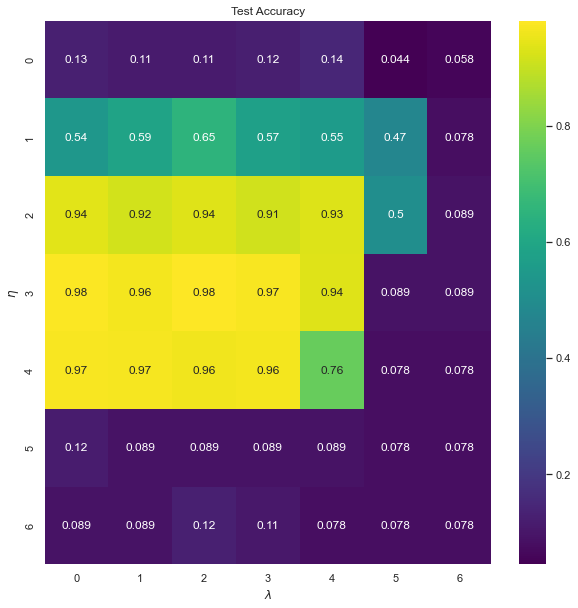

In [10]:
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        CNN = CNN_keras[i][j]

        train_accuracy[i][j] = CNN.evaluate(X_train, Y_train)[1]
        test_accuracy[i][j] = CNN.evaluate(X_test, Y_test)[1]

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

## The CIFAR01 data set

The CIFAR10 dataset contains 60,000 color images in 10 classes, with
6,000 images in each class. The dataset is divided into 50,000
training images and 10,000 testing images. The classes are mutually
exclusive and there is no overlap between them.

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# We import the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255. 
train_images, test_images = train_images / 255.0, test_images / 255.0

## Verifying the data set

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
​
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Set up  the model

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of our model so far.

model.summary()

You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

## Add Dense layers on top

To complete our model, you will feed the last output tensor from the
convolutional base (of shape (4, 4, 64)) into one or more Dense layers
to perform classification. Dense layers take vectors as input (which
are 1D), while the current output is a 3D tensor. First, you will
flatten (or unroll) the 3D output to 1D, then add one or more Dense
layers on top. CIFAR has 10 output classes, so you use a final Dense
layer with 10 outputs and a softmax activation.

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
Here's the complete architecture of our model.

model.summary()

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
​
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

## Finally, evaluate the model

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

## Recurrent neural networks: Overarching view

Till now our focus has been, including convolutional neural networks
as well, on feedforward neural networks. The output or the activations
flow only in one direction, from the input layer to the output layer.

A recurrent neural network (RNN) looks very much like a feedforward
neural network, except that it also has connections pointing
backward. 

RNNs are used to analyze time series data such as stock prices, and
tell you when to buy or sell. In autonomous driving systems, they can
anticipate car trajectories and help avoid accidents. More generally,
they can work on sequences of arbitrary lengths, rather than on
fixed-sized inputs like all the nets we have discussed so far. For
example, they can take sentences, documents, or audio samples as
input, making them extremely useful for natural language processing
systems such as automatic translation and speech-to-text.

## Set up of an RNN

More to text to be added

## A simple example

In [24]:
# Start importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras import optimizers     
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical 



# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()

## An extrapolation example

The following code provides an example of how recurrent neural
networks can be used to extrapolate to unknown values of physics data
sets.  Specifically, the data sets used in this program come from
a quantum mechanical many-body calculation of energies as functions of the number of particles.

In [25]:

# For matrices and calculations
import numpy as np
# For machine learning (backend for keras)
import tensorflow as tf
# User-friendly machine learning library
# Front end for TensorFlow
import tensorflow.keras
# Different methods from Keras needed to create an RNN
# This is not necessary but it shortened function calls 
# that need to be used in the code.
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
# For timing the code
from timeit import default_timer as timer
# For plotting
import matplotlib.pyplot as plt


# The data set
datatype='VaryDimension'
X_tot = np.arange(2, 42, 2)
y_tot = np.array([-0.03077640549, -0.08336233266, -0.1446729567, -0.2116753732, -0.2830637392, -0.3581341341, -0.436462435, -0.5177783846,
	-0.6019067271, -0.6887363571, -0.7782028952, -0.8702784034, -0.9649652536, -1.062292565, -1.16231451, 
	-1.265109911, -1.370782966, -1.479465113, -1.591317992, -1.70653767])

## Formatting the Data

The way the recurrent neural networks are trained in this program
differs from how machine learning algorithms are usually trained.
Typically a machine learning algorithm is trained by learning the
relationship between the x data and the y data.  In this program, the
recurrent neural network will be trained to recognize the relationship
in a sequence of y values.  This is type of data formatting is
typically used time series forcasting, but it can also be used in any
extrapolation (time series forecasting is just a specific type of
extrapolation along the time axis).  This method of data formatting
does not use the x data and assumes that the y data are evenly spaced.

For a standard machine learning algorithm, the training data has the
form of (x,y) so the machine learning algorithm learns to assiciate a
y value with a given x value.  This is useful when the test data has x
values within the same range as the training data.  However, for this
application, the x values of the test data are outside of the x values
of the training data and the traditional method of training a machine
learning algorithm does not work as well.  For this reason, the
recurrent neural network is trained on sequences of y values of the
form ((y1, y2), y3), so that the network is concerned with learning
the pattern of the y data and not the relation between the x and y
data.  As long as the pattern of y data outside of the training region
stays relatively stable compared to what was inside the training
region, this method of training can produce accurate extrapolations to
y values far removed from the training data set.

<!--  -->
<!-- The idea behind formatting the data in this way comes from [this resource](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) and [this one](https://fairyonice.github.io/Understand-Keras%27s-RNN-behind-the-scenes-with-a-sin-wave-example.html). -->
<!--  -->
<!-- The following method takes in a y data set and formats it so the "x data" are of the form (y1, y2) and the "y data" are of the form y3, with extra brackets added in to make the resulting arrays compatable with both Keras and Tensorflow. -->
<!--  -->
<!-- Note: Using a sequence length of two is not required for time series forecasting so any lenght of sequence could be used (for example instead of ((y1, y2) y3) you could change the length of sequence to be 4 and the resulting data points would have the form ((y1, y2, y3, y4), y5)).  While the following method can be used to create a data set of any sequence length, the remainder of the code expects the length of sequence to be 2.  This is because the data sets are very small and the higher the lenght of the sequence the less resulting data points. -->

In [26]:
# FORMAT_DATA
def format_data(data, length_of_sequence = 2):  
    """
        Inputs:
            data(a numpy array): the data that will be the inputs to the recurrent neural
                network
            length_of_sequence (an int): the number of elements in one iteration of the
                sequence patter.  For a function approximator use length_of_sequence = 2.
        Returns:
            rnn_input (a 3D numpy array): the input data for the recurrent neural network.  Its
                dimensions are length of data - length of sequence, length of sequence, 
                dimnsion of data
            rnn_output (a numpy array): the training data for the neural network
        Formats data to be used in a recurrent neural network.
    """

    X, Y = [], []
    for i in range(len(data)-length_of_sequence):
        # Get the next length_of_sequence elements
        a = data[i:i+length_of_sequence]
        # Get the element that immediately follows that
        b = data[i+length_of_sequence]
        # Reshape so that each data point is contained in its own array
        a = np.reshape (a, (len(a), 1))
        X.append(a)
        Y.append(b)
    rnn_input = np.array(X)
    rnn_output = np.array(Y)

    return rnn_input, rnn_output


# ## Defining the Recurrent Neural Network Using Keras
# 
# The following method defines a simple recurrent neural network in keras consisting of one input layer, one hidden layer, and one output layer.

def rnn(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with one hidden layer and returns the model.
    """
    # Number of neurons in the input and output layers
    in_out_neurons = 1
    # Number of neurons in the hidden layer
    hidden_neurons = 200
    # Define the input layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons))  
    # Define the hidden layer as a simple RNN layer with a set number of neurons and add it to 
    # the network immediately after the input layer
    rnn = SimpleRNN(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN")(inp)
    # Define the output layer as a dense neural network layer (standard neural network layer)
    #and add it to the network immediately after the hidden layer.
    dens = Dense(in_out_neurons,name="dense")(rnn)
    # Create the machine learning model starting with the input layer and ending with the 
    # output layer
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the machine learning model using the mean squared error function as the loss 
    # function and an Adams optimizer.
    model.compile(loss="mean_squared_error", optimizer="adam")  
    return model

## Predicting New Points With A Trained Recurrent Neural Network

In [27]:
def test_rnn (x1, y_test, plot_min, plot_max):
    """
        Inputs:
            x1 (a list or numpy array): The complete x component of the data set
            y_test (a list or numpy array): The complete y component of the data set
            plot_min (an int or float): the smallest x value used in the training data
            plot_max (an int or float): the largest x valye used in the training data
        Returns:
            None.
        Uses a trained recurrent neural network model to predict future points in the 
        series.  Computes the MSE of the predicted data set from the true data set, saves
        the predicted data set to a csv file, and plots the predicted and true data sets w
        while also displaying the data range used for training.
    """
    # Add the training data as the first dim points in the predicted data array as these
    # are known values.
    y_pred = y_test[:dim].tolist()
    # Generate the first input to the trained recurrent neural network using the last two 
    # points of the training data.  Based on how the network was trained this means that it
    # will predict the first point in the data set after the training data.  All of the 
    # brackets are necessary for Tensorflow.
    next_input = np.array([[[y_test[dim-2]], [y_test[dim-1]]]])
    # Save the very last point in the training data set.  This will be used later.
    last = [y_test[dim-1]]

    # Iterate until the complete data set is created.
    for i in range (dim, len(y_test)):
        # Predict the next point in the data set using the previous two points.
        next = model.predict(next_input)
        # Append just the number of the predicted data set
        y_pred.append(next[0][0])
        # Create the input that will be used to predict the next data point in the data set.
        next_input = np.array([[last, next[0]]], dtype=np.float64)
        last = next

    # Print the mean squared error between the known data set and the predicted data set.
    print('MSE: ', np.square(np.subtract(y_test, y_pred)).mean())
    # Save the predicted data set as a csv file for later use
    name = datatype + 'Predicted'+str(dim)+'.csv'
    np.savetxt(name, y_pred, delimiter=',')
    # Plot the known data set and the predicted data set.  The red box represents the region that was used
    # for the training data.
    fig, ax = plt.subplots()
    ax.plot(x1, y_test, label="true", linewidth=3)
    ax.plot(x1, y_pred, 'g-.',label="predicted", linewidth=4)
    ax.legend()
    # Created a red region to represent the points used in the training data.
    ax.axvspan(plot_min, plot_max, alpha=0.25, color='red')
    plt.show()

# Check to make sure the data set is complete
assert len(X_tot) == len(y_tot)

# This is the number of points that will be used in as the training data
dim=12

# Separate the training data from the whole data set
X_train = X_tot[:dim]
y_train = y_tot[:dim]


# Generate the training data for the RNN, using a sequence of 2
rnn_input, rnn_training = format_data(y_train, 2)


# Create a recurrent neural network in Keras and produce a summary of the 
# machine learning model
model = rnn(length_of_sequences = rnn_input.shape[1])
model.summary()

# Start the timer.  Want to time training+testing
start = timer()
# Fit the model using the training data genenerated above using 150 training iterations and a 5%
# validation split.  Setting verbose to True prints information about each training iteration.
hist = model.fit(rnn_input, rnn_training, batch_size=None, epochs=150, 
                 verbose=True,validation_split=0.05)

for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

# Use the trained neural network to predict more points of the data set
test_rnn(X_tot, y_tot, X_tot[0], X_tot[dim-1])
# Stop the timer and calculate the total time needed.
end = timer()
print('Time: ', end-start)

## Other Things to Try

Changing the size of the recurrent neural network and its parameters
can drastically change the results you get from the model.  The below
code takes the simple recurrent neural network from above and adds a
second hidden layer, changes the number of neurons in the hidden
layer, and explicitly declares the activation function of the hidden
layers to be a sigmoid function.  The loss function and optimizer can
also be changed but are kept the same as the above network.  These
parameters can be tuned to provide the optimal result from the
network.  For some ideas on how to improve the performance of a
[recurrent neural network](https://danijar.com/tips-for-training-recurrent-neural-networks).

In [28]:
def rnn_2layers(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with two hidden layers and returns the model.
    """
    # Number of neurons in the input and output layers
    in_out_neurons = 1
    # Number of neurons in the hidden layer, increased from the first network
    hidden_neurons = 500
    # Define the input layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons))  
    # Create two hidden layers instead of one hidden layer.  Explicitly set the activation
    # function to be the sigmoid function (the default value is hyperbolic tangent)
    rnn1 = SimpleRNN(hidden_neurons, 
                    return_sequences=True,  # This needs to be True if another hidden layer is to follow
                    stateful = stateful, activation = 'sigmoid',
                    name="RNN1")(inp)
    rnn2 = SimpleRNN(hidden_neurons, 
                    return_sequences=False, activation = 'sigmoid',
                    stateful = stateful,
                    name="RNN2")(rnn1)
    # Define the output layer as a dense neural network layer (standard neural network layer)
    #and add it to the network immediately after the hidden layer.
    dens = Dense(in_out_neurons,name="dense")(rnn2)
    # Create the machine learning model starting with the input layer and ending with the 
    # output layer
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the machine learning model using the mean squared error function as the loss 
    # function and an Adams optimizer.
    model.compile(loss="mean_squared_error", optimizer="adam")  
    return model

# Check to make sure the data set is complete
assert len(X_tot) == len(y_tot)

# This is the number of points that will be used in as the training data
dim=12

# Separate the training data from the whole data set
X_train = X_tot[:dim]
y_train = y_tot[:dim]


# Generate the training data for the RNN, using a sequence of 2
rnn_input, rnn_training = format_data(y_train, 2)


# Create a recurrent neural network in Keras and produce a summary of the 
# machine learning model
model = rnn_2layers(length_of_sequences = 2)
model.summary()

# Start the timer.  Want to time training+testing
start = timer()
# Fit the model using the training data genenerated above using 150 training iterations and a 5%
# validation split.  Setting verbose to True prints information about each training iteration.
hist = model.fit(rnn_input, rnn_training, batch_size=None, epochs=150, 
                 verbose=True,validation_split=0.05)


# This section plots the training loss and the validation loss as a function of training iteration.
# This is not required for analyzing the couple cluster data but can help determine if the network is
# being overtrained.
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

# Use the trained neural network to predict more points of the data set
test_rnn(X_tot, y_tot, X_tot[0], X_tot[dim-1])
# Stop the timer and calculate the total time needed.
end = timer()
print('Time: ', end-start)

## Other Types of Recurrent Neural Networks

Besides a simple recurrent neural network layer, there are two other
commonly used types of recurrent neural network layers: Long Short
Term Memory (LSTM) and Gated Recurrent Unit (GRU).  For a short
introduction to these layers see <https://medium.com/mindboard/lstm-vs-gru-experimental-comparison-955820c21e8b>
and <https://medium.com/mindboard/lstm-vs-gru-experimental-comparison-955820c21e8b>.

The first network created below is similar to the previous network,
but it replaces the SimpleRNN layers with LSTM layers.  The second
network below has two hidden layers made up of GRUs, which are
preceeded by two dense (feeddorward) neural network layers.  These
dense layers "preprocess" the data before it reaches the recurrent
layers.  This architecture has been shown to improve the performance
of recurrent neural networks (see the link above and also
<https://arxiv.org/pdf/1807.02857.pdf>.

In [29]:
def lstm_2layers(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with two LSTM hidden layers and returns the model.
    """
    # Number of neurons on the input/output layer and the number of neurons in the hidden layer
    in_out_neurons = 1
    hidden_neurons = 250
    # Input Layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons)) 
    # Hidden layers (in this case they are LSTM layers instead if SimpleRNN layers)
    rnn= LSTM(hidden_neurons, 
                    return_sequences=True,
                    stateful = stateful,
                    name="RNN", use_bias=True, activation='tanh')(inp)
    rnn1 = LSTM(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN1", use_bias=True, activation='tanh')(rnn)
    # Output layer
    dens = Dense(in_out_neurons,name="dense")(rnn1)
    # Define the midel
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')  
    # Return the model
    return model

def dnn2_gru2(length_of_sequences, batch_size = None, stateful = False):
    """
        Inputs:
            length_of_sequences (an int): the number of y values in "x data".  This is determined
                when the data is formatted
            batch_size (an int): Default value is None.  See Keras documentation of SimpleRNN.
            stateful (a boolean): Default value is False.  See Keras documentation of SimpleRNN.
        Returns:
            model (a Keras model): The recurrent neural network that is built and compiled by this
                method
        Builds and compiles a recurrent neural network with four hidden layers (two dense followed by
        two GRU layers) and returns the model.
    """    
    # Number of neurons on the input/output layers and hidden layers
    in_out_neurons = 1
    hidden_neurons = 250
    # Input layer
    inp = Input(batch_shape=(batch_size, 
                length_of_sequences, 
                in_out_neurons)) 
    # Hidden Dense (feedforward) layers
    dnn = Dense(hidden_neurons/2, activation='relu', name='dnn')(inp)
    dnn1 = Dense(hidden_neurons/2, activation='relu', name='dnn1')(dnn)
    # Hidden GRU layers
    rnn1 = GRU(hidden_neurons, 
                    return_sequences=True,
                    stateful = stateful,
                    name="RNN1", use_bias=True)(dnn1)
    rnn = GRU(hidden_neurons, 
                    return_sequences=False,
                    stateful = stateful,
                    name="RNN", use_bias=True)(rnn1)
    # Output layer
    dens = Dense(in_out_neurons,name="dense")(rnn)
    # Define the model
    model = Model(inputs=[inp],outputs=[dens])
    # Compile the mdoel
    model.compile(loss='mean_squared_error', optimizer='adam')  
    # Return the model
    return model

# Check to make sure the data set is complete
assert len(X_tot) == len(y_tot)

# This is the number of points that will be used in as the training data
dim=12

# Separate the training data from the whole data set
X_train = X_tot[:dim]
y_train = y_tot[:dim]


# Generate the training data for the RNN, using a sequence of 2
rnn_input, rnn_training = format_data(y_train, 2)


# Create a recurrent neural network in Keras and produce a summary of the 
# machine learning model
# Change the method name to reflect which network you want to use
model = dnn2_gru2(length_of_sequences = 2)
model.summary()

# Start the timer.  Want to time training+testing
start = timer()
# Fit the model using the training data genenerated above using 150 training iterations and a 5%
# validation split.  Setting verbose to True prints information about each training iteration.
hist = model.fit(rnn_input, rnn_training, batch_size=None, epochs=150, 
                 verbose=True,validation_split=0.05)


# This section plots the training loss and the validation loss as a function of training iteration.
# This is not required for analyzing the couple cluster data but can help determine if the network is
# being overtrained.
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

# Use the trained neural network to predict more points of the data set
test_rnn(X_tot, y_tot, X_tot[0], X_tot[dim-1])
# Stop the timer and calculate the total time needed.
end = timer()
print('Time: ', end-start)


# ### Training Recurrent Neural Networks in the Standard Way (i.e. learning the relationship between the X and Y data)
# 
# Finally, comparing the performace of a recurrent neural network using the standard data formatting to the performance of the network with time sequence data formatting shows the benefit of this type of data formatting with extrapolation.

# Check to make sure the data set is complete
assert len(X_tot) == len(y_tot)

# This is the number of points that will be used in as the training data
dim=12

# Separate the training data from the whole data set
X_train = X_tot[:dim]
y_train = y_tot[:dim]

# Reshape the data for Keras specifications
X_train = X_train.reshape((dim, 1))
y_train = y_train.reshape((dim, 1))


# Create a recurrent neural network in Keras and produce a summary of the 
# machine learning model
# Set the sequence length to 1 for regular data formatting 
model = rnn(length_of_sequences = 1)
model.summary()

# Start the timer.  Want to time training+testing
start = timer()
# Fit the model using the training data genenerated above using 150 training iterations and a 5%
# validation split.  Setting verbose to True prints information about each training iteration.
hist = model.fit(X_train, y_train, batch_size=None, epochs=150, 
                 verbose=True,validation_split=0.05)


# This section plots the training loss and the validation loss as a function of training iteration.
# This is not required for analyzing the couple cluster data but can help determine if the network is
# being overtrained.
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

# Use the trained neural network to predict the remaining data points
X_pred = X_tot[dim:]
X_pred = X_pred.reshape((len(X_pred), 1))
y_model = model.predict(X_pred)
y_pred = np.concatenate((y_tot[:dim], y_model.flatten()))

# Plot the known data set and the predicted data set.  The red box represents the region that was used
# for the training data.
fig, ax = plt.subplots()
ax.plot(X_tot, y_tot, label="true", linewidth=3)
ax.plot(X_tot, y_pred, 'g-.',label="predicted", linewidth=4)
ax.legend()
# Created a red region to represent the points used in the training data.
ax.axvspan(X_tot[0], X_tot[dim], alpha=0.25, color='red')
plt.show()

# Stop the timer and calculate the total time needed.
end = timer()
print('Time: ', end-start)

## Generative Models

**Generative models** describe a class of statistical models that are a contrast
to **discriminative models**. Informally we say that generative models can
generate new data instances while discriminative models discriminate between
different kinds of data instances. A generative model could generate new photos
of animals that look like 'real' animals while a discriminative model could tell
a dog from a cat. More formally, given a data set $x$ and a set of labels /
targets $y$. Generative models capture the joint probability $p(x, y)$, or
just $p(x)$ if there are no labels, while discriminative models capture the
conditional probability $p(y | x)$. Discriminative models generally try to draw
boundaries in the data space (often high dimensional), while generative models
try to model how data is placed throughout the space.

**Note**: this material is thanks to Linus Ekstrøm.

## Generative Adversarial Networks

**Generative Adversarial Networks** are a type of unsupervised machine learning
algorithm proposed by [Goodfellow et. al](https://arxiv.org/pdf/1406.2661.pdf)
in 2014 (short and good article).

The simplest formulation of
the model is based on a game theoretic approach, *zero sum game*, where we pit
two neural networks against one another. We define two rival networks, one
generator $g$, and one discriminator $d$. The generator directly produces
samples

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
    x = g(z; \theta^{(g)})
\label{_auto4} \tag{6}
\end{equation}
$$

## Discriminator
The discriminator attempts to distinguish between samples drawn from the
training data and samples drawn from the generator. In other words, it tries to
tell the difference between the fake data produced by $g$ and the actual data
samples we want to do prediction on. The discriminator outputs a probability
value given by

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
    d(x; \theta^{(d)})
\label{_auto5} \tag{7}
\end{equation}
$$

indicating the probability that $x$ is a real training example rather than a
fake sample the generator has generated. The simplest way to formulate the
learning process in a generative adversarial network is a zero-sum game, in
which a function

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
    v(\theta^{(g)}, \theta^{(d)})
\label{_auto6} \tag{8}
\end{equation}
$$

determines the reward for the discriminator, while the generator gets the
conjugate reward

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
    -v(\theta^{(g)}, \theta^{(d)})
\label{_auto7} \tag{9}
\end{equation}
$$

## Learning Process

During learning both of the networks maximize their own reward function, so that
the generator gets better and better at tricking the discriminator, while the
discriminator gets better and better at telling the difference between the fake
and real data. The generator and discriminator alternate on which one trains at
one time (i.e. for one epoch). In other words, we keep the generator constant
and train the discriminator, then we keep the discriminator constant to train
the generator and repeat. It is this back and forth dynamic which lets GANs
tackle otherwise intractable generative problems. As the generator improves with
 training, the discriminator's performance gets worse because it cannot easily
 tell the difference between real and fake. If the generator ends up succeeding
 perfectly, the the discriminator will do no better than random guessing i.e.
 50\%. This progression in the training poses a problem for the convergence
 criteria for GANs. The discriminator feedback gets less meaningful over time,
 if we continue training after this point then the generator is effectively
 training on junk data which can undo the learning up to that point. Therefore,
 we stop training when the discriminator starts outputting $1/2$ everywhere.

## More about the Learning Process

At convergence we have

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
    g^* = \underset{g}{\mathrm{argmin}}\hspace{2pt}
          \underset{d}{\mathrm{max}}v(\theta^{(g)}, \theta^{(d)})
\label{_auto8} \tag{10}
\end{equation}
$$

The default choice for $v$ is

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
    v(\theta^{(g)}, \theta^{(d)}) = \mathbb{E}_{x\sim p_\mathrm{data}}\log d(x)
                                  + \mathbb{E}_{x\sim p_\mathrm{model}}
                                  \log (1 - d(x))
\label{_auto9} \tag{11}
\end{equation}
$$

The main motivation for the design of GANs is that the learning process requires
neither approximate inference (variational autoencoders for example) nor
approximation of a partition function. In the case where

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
    \underset{d}{\mathrm{max}}v(\theta^{(g)}, \theta^{(d)})
\label{_auto10} \tag{12}
\end{equation}
$$

is convex in $\theta^{(g)} then the procedure is guaranteed to converge and is
asymptotically consistent
( [Seth Lloyd on QuGANs](https://arxiv.org/pdf/1804.09139.pdf)  ).

## Additional References
This is in
general not the case and it is possible to get situations where the training
process never converges because the generator and discriminator chase one
another around in the parameter space indefinitely. A much deeper discussion on
the currently open research problem of GAN convergence is available
[here](https://www.deeplearningbook.org/contents/generative_models.html). To
anyone interested in learning more about GANs it is a highly recommended read.
Direct quote: "In this best-performing formulation, the generator aims to
increase the log probability that the discriminator makes a mistake, rather than
aiming to decrease the log probability that the discriminator makes the correct
prediction." [Another interesting read](https://arxiv.org/abs/1701.00160)

## Writing Our First Generative Adversarial Network
Let us now move on to actually implementing a GAN in tensorflow. We will study
the performance of our GAN on the MNIST dataset. This code is based on and
adapted from the
[google tutorial](https://www.tensorflow.org/tutorials/generative/dcgan)

First we import our libraries

In [30]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

Next we define our hyperparameters and import our data the usual way

In [31]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
EPOCHS = 30

data = tf.keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
train_images = np.reshape(train_images, (train_images.shape[0],
                                         28,
                                         28,
                                         1)).astype('float32')

# we normalize between -1 and 1
train_images = (train_images - 127.5) / 127.5
training_dataset = tf.data.Dataset.from_tensor_slices(
                      train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## MNIST and GANs

Let's have a quick look

In [32]:
plt.imshow(train_images[0], cmap='Greys')
plt.show()

Now we define our two models. This is where the 'magic' happens. There are a
huge amount of possible formulations for both models. A lot of engineering and
trial and error can be done here to try to produce better performing models. For
more advanced GANs this is by far the step where you can 'make or break' a
model.

We start with the generator. As stated in the introductory text the generator
$g$ upsamples from a random sample to the shape of what we want to predict. In
our case we are trying to predict MNIST images ($28\times 28$ pixels).

In [33]:
def generator_model():
    """
    The generator uses upsampling layers tf.keras.layers.Conv2DTranspose() to
    produce an image from a random seed. We start with a Dense layer taking this
    random sample as an input and subsequently upsample through multiple
    convolutional layers.
    """

    # we define our model
    model = tf.keras.Sequential()


    # adding our input layer. Dense means that every neuron is connected and
    # the input shape is the shape of our random noise. The units need to match
    # in some sense the upsampling strides to reach our desired output shape.
    # we are using 100 random numbers as our seed
    model.add(layers.Dense(units=7*7*BATCH_SIZE,
                           use_bias=False,
                           input_shape=(100, )))
    # we normalize the output form the Dense layer
    model.add(layers.BatchNormalization())
    # and add an activation function to our 'layer'. LeakyReLU avoids vanishing
    # gradient problem
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, BATCH_SIZE)))
    assert model.output_shape == (None, 7, 7, BATCH_SIZE)
    # even though we just added four keras layers we think of everything above
    # as 'one' layer

    # next we add our upscaling convolutional layers
    model.add(layers.Conv2DTranspose(filters=128,
                                     kernel_size=(5, 5),
                                     strides=(1, 1),
                                     padding='same',
                                     use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 7, 7, 128)

    model.add(layers.Conv2DTranspose(filters=64,
                                     kernel_size=(5, 5),
                                     strides=(2, 2),
                                     padding='same',
                                     use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    assert model.output_shape == (None, 14, 14, 64)

    model.add(layers.Conv2DTranspose(filters=1,
                                     kernel_size=(5, 5),
                                     strides=(2, 2),
                                     padding='same',
                                     use_bias=False,
                                     activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

And there we have our 'simple' generator model. Now we move on to defining our
discriminator model $d$, which is a convolutional neural network based image
classifier.

In [34]:
def discriminator_model():
    """
    The discriminator is a convolutional neural network based image classifier
    """

    # we define our model
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(filters=64,
                            kernel_size=(5, 5),
                            strides=(2, 2),
                            padding='same',
                            input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    # adding a dropout layer as you do in conv-nets
    model.add(layers.Dropout(0.3))


    model.add(layers.Conv2D(filters=128,
                            kernel_size=(5, 5),
                            strides=(2, 2),
                            padding='same'))
    model.add(layers.LeakyReLU())
    # adding a dropout layer as you do in conv-nets
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

## Other Models
Let us take a look at our models. **Note**: double click images for bigger view.

In [35]:
generator = generator_model()
plot_model(generator, show_shapes=True, rankdir='LR')

In [36]:
discriminator = discriminator_model()
plot_model(discriminator, show_shapes=True, rankdir='LR')

Next we need a few helper objects we will use in training

In [37]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

The first object, *cross_entropy* is our loss function and the two others are
our optimizers. Notice we use the same learning rate for both $g$ and $d$. This
is because they need to improve their accuracy at approximately equal speeds to
get convergence (not necessarily exactly equal). Now we define our loss
functions

In [38]:
def generator_loss(fake_output):
    loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    return loss

In [39]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_liks(fake_output), fake_output)
    total_loss = real_loss + fake_loss

    return total_loss

Next we define a kind of seed to help us compare the learning process over
multiple training epochs.

In [40]:
noise_dimension = 100
n_examples_to_generate = 16
seed_images = tf.random.normal([n_examples_to_generate, noise_dimension])

## Training Step

Now we have everything we need to define our training step, which we will apply
for every step in our training loop. Notice the @tf.function flag signifying
that the function is tensorflow 'compiled'. Removing this flag doubles the
computation time.

In [41]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dimension])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,
                                            generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,
                                            discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator,
                                            generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,
                                            discriminator.trainable_variables))

    return gen_loss, disc_loss

Next we define a helper function to produce an output over our training epochs
to see the predictive progression of our generator model. **Note**: I am including
this code here, but comment it out in the training loop.

In [42]:
def generate_and_save_images(model, epoch, test_input):
    # we're making inferences here
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'./images_from_seed_images/image_at_epoch_{str(epoch).zfill(3)}.png')
    plt.close()
    #plt.show()

## Checkpoints
Setting up checkpoints to periodically save our model during training so that
everything is not lost even if the program were to somehow terminate while
training.

In [43]:
# Setting up checkpoints to save model during training
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                            discriminator_optimizer=discriminator_optimizer,
                            generator=generator,
                            discriminator=discriminator)

Now we define our training loop

In [44]:
def train(dataset, epochs):
    generator_loss_list = []
    discriminator_loss_list = []

    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            generator_loss_list.append(gen_loss.numpy())
            discriminator_loss_list.append(disc_loss.numpy())

        #generate_and_save_images(generator, epoch + 1, seed_images)

        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        print(f'Time for epoch {epoch} is {time.time() - start}')

    #generate_and_save_images(generator, epochs, seed_images)

    loss_file = './data/lossfile.txt'
    with open(loss_file, 'w') as outfile:
        outfile.write(str(generator_loss_list))
        outfile.write('\n')
        outfile.write('\n')
        outfile.write(str(discriminator_loss_list))
        outfile.write('\n')
        outfile.write('\n')

To train simply call this function. **Warning**: this might take a long time so
there is a folder of a pretrained network already included in the repository.

In [45]:
train(train_dataset, EPOCHS)

And here is the result of training our model for 100 epochs

<!-- dom:MOVIE: [images_from_seed_images/generation.gif] -->
<!-- begin movie -->

In [46]:
from IPython.display import HTML
_s = """
<embed src="images_from_seed_images/generation.gif"  autoplay="false" loop="true"></embed>
<p><em></em></p>
"""
HTML(_s)

<!-- end movie -->

Now to avoid having to train and everything, which will take a while depending
on your computer setup we now load in the model which produced the above gif.

In [47]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
restored_generator = checkpoint.generator
restored_discriminator = checkpoint.discriminator

print(restored_generator)
print(restored_discriminator)

## Exploring the Latent Space

We have successfully loaded in our latest model. Let us now play around a bit
and see what kind of things we can learn about this model. Our generator takes
an array of 100 numbers. One idea can be to try to systematically change our
input. Let us try and see what we get

In [48]:
def generate_latent_points(number=100, scale_means=1, scale_stds=1):
    latent_dim = 100
    means = scale_means * tf.linspace(-1, 1, num=latent_dim)
    stds = scale_stds * tf.linspace(-1, 1, num=latent_dim)
    latent_space_value_range = tf.random.normal([number, latent_dim],
                                                means,
                                                stds,
                                                dtype=tf.float64)

    return latent_space_value_range

def generate_images(latent_points):
    # notice we set training to false because we are making inferences
    generated_images = restored_generator.predict(latent_points)

    return generated_images

In [49]:
def plot_result(generated_images, number=100):
    # obviously this assumes sqrt number is an int
    fig, axs = plt.subplots(int(np.sqrt(number)), int(np.sqrt(number)),
                            figsize=(10, 10))

    for i in range(int(np.sqrt(number))):
        for j in range(int(np.sqrt(number))):
            axs[i, j].imshow(generated_images[i*j], cmap='Greys')
            axs[i, j].axis('off')

    plt.show()

In [50]:
generated_images = generate_images(generate_latent_points())
plot_result(generated_images)

## Getting Results
We see that the generator generates images that look like MNIST
numbers: $1, 4, 7, 9$. Let's try to tweak it a bit more to see if we are able
to generate a similar plot where we generate every MNIST number. Let us now try
to 'move' a bit around in the latent space. **Note**: decrease the plot number if
these following cells take too long to run on your computer.

In [51]:
plot_number = 225

generated_images = generate_images(generate_latent_points(number=plot_number,
                                                          scale_means=5,
                                                          scale_stds=1))
plot_result(generated_images, number=plot_number)

generated_images = generate_images(generate_latent_points(number=plot_number,
                                                          scale_means=-5,
                                                          scale_stds=1))
plot_result(generated_images, number=plot_number)

generated_images = generate_images(generate_latent_points(number=plot_number,
                                                          scale_means=1,
                                                          scale_stds=5))
plot_result(generated_images, number=plot_number)

Again, we have found something interesting. *Moving* around using our means
takes us from digit to digit, while *moving* around using our standard
deviations seem to increase the number of different digits! In the last image
above, we can barely make out every MNIST digit. Let us make on last plot using
this information by upping the standard deviation of our Gaussian noises.

In [52]:
plot_number = 400
generated_images = generate_images(generate_latent_points(number=plot_number,
                                                          scale_means=1,
                                                          scale_stds=10))
plot_result(generated_images, number=plot_number)

A pretty cool result! We see that our generator indeed has learned a
distribution which qualitatively looks a whole lot like the MNIST dataset.

## Interpolating Between MNIST Digits
Another interesting way to explore the latent space of our generator model is by
interpolating between the MNIST digits. This section is largely based on
[this excellent blogpost](https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/)
by Jason Brownlee.

So let us start by defining a function to interpolate between two points in the
latent space.

In [53]:
def interpolation(point_1, point_2, n_steps=10):
    ratios = np.linspace(0, 1, num=n_steps)
    vectors = []
    for i, ratio in enumerate(ratios):
        vectors.append(((1.0 - ratio) * point_1 + ratio * point_2))

    return tf.stack(vectors)

Now we have all we need to do our interpolation analysis.

In [54]:
plot_number = 100
latent_points = generate_latent_points(number=plot_number)
results = None
for i in range(0, 2*np.sqrt(plot_number), 2):
    interpolated = interpolation(latent_points[i], latent_points[i+1])
    generated_images = generate_images(interpolated)

    if results is None:
        results = generated_images
    else:
        results = tf.stack((results, generated_images))

plot_results(results, plot_number)